In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from libs.volatility import get_volatility, populate_df_volatility

In [2]:
ticker = yf.ticker.Ticker("TQQQ")

In [3]:
ticker.options

('2025-04-17',
 '2025-04-25',
 '2025-05-02',
 '2025-05-09',
 '2025-05-16',
 '2025-05-23',
 '2025-06-20',
 '2025-09-19',
 '2026-01-16',
 '2027-01-15')

In [4]:
tqqq_option = ticker.option_chain('2025-04-17')
tqqq_option.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TQQQ250417C00030000,2025-04-11 19:11:02+00:00,30.0,19.20,16.85,19.00,3.250001,20.376183,118,333,2.851565,True,REGULAR,USD
1,TQQQ250417C00035000,2025-04-11 18:59:57+00:00,35.0,14.15,12.10,14.40,1.650000,13.199997,109,852,2.529301,True,REGULAR,USD
2,TQQQ250417C00040000,2025-04-11 19:57:07+00:00,40.0,9.70,9.00,9.55,1.700000,21.249998,1153,2758,1.646486,True,REGULAR,USD
3,TQQQ250417C00041000,2025-04-11 19:58:19+00:00,41.0,8.70,7.80,9.70,1.100000,14.473682,368,1083,1.835938,True,REGULAR,USD
4,TQQQ250417C00042000,2025-04-11 19:59:29+00:00,42.0,7.85,7.65,8.05,1.210000,18.222893,1547,1637,1.734376,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TQQQ250417C00100000,2025-04-11 15:23:58+00:00,100.0,0.02,0.00,0.02,0.000000,0.000000,1,2971,2.125005,False,REGULAR,USD
81,TQQQ250417C00101000,2025-04-11 13:37:32+00:00,101.0,0.01,0.00,0.20,0.000000,0.000000,72,144,2.796878,False,REGULAR,USD
82,TQQQ250417C00102000,2025-04-11 15:50:21+00:00,102.0,0.50,0.00,0.05,0.490000,4900.000500,15,39,2.406254,False,REGULAR,USD
83,TQQQ250417C00105000,2025-04-11 19:18:44+00:00,105.0,0.01,0.00,0.05,0.000000,0.000000,20,175,2.468754,False,REGULAR,USD


In [5]:
df = ticker.history(start="2025-03-10", end="2025-04-10")
df['Returns'] = np.log( df['Close'] / df['Close'].shift() ).dropna()
np.std( df['Returns'] ) * np.sqrt(252) 

1.4940042121269006

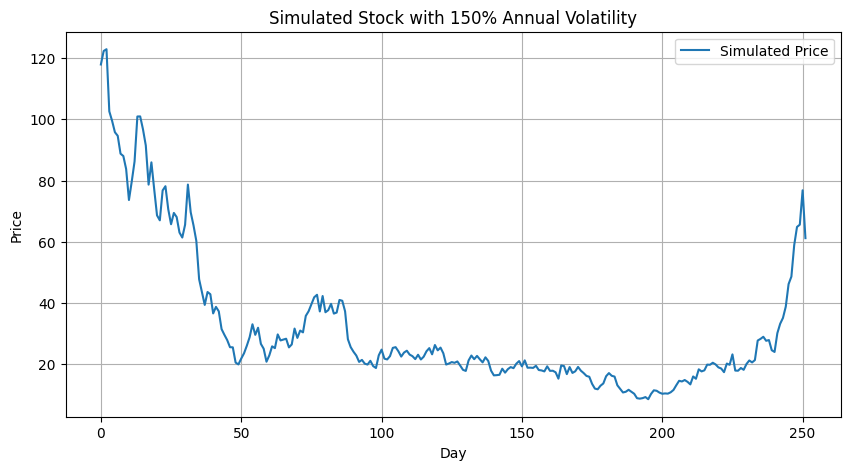

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100             # Initial stock price
mu = 0               # Drift (set to 0 to focus on volatility)
sigma = 1.5          # 150% annualized volatility
T = 1                # 1 year
steps = 252          # Trading days in a year
dt = T / steps       # Time increment

# Simulate returns
np.random.seed(3)   # For reproducibility
Z = np.random.normal(0, 1, steps)
returns = (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z

# Generate price path
prices = S0 * np.exp(np.cumsum(returns))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(prices, label="Simulated Price")
plt.title("Simulated Stock with 150% Annual Volatility")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
today = pd.Timestamp.today().normalize()

# Generate the last 5 business days
business_dates = pd.date_range(end=today, periods=30, freq='B')

DATE_FORMAT = "%Y-%m-%d"

start = business_dates[0].strftime( DATE_FORMAT )
end = business_dates[-1].strftime( DATE_FORMAT )

In [8]:
df_tqqq = ticker.history(start=start, end=end)
df_tqqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-03-03 00:00:00-05:00,76.145354,76.823354,68.238680,69.873856,91945800,0.000,0.0,0.0
2025-03-04 00:00:00-05:00,68.557740,72.555938,65.815829,69.106117,130836900,0.000,0.0,0.0
2025-03-05 00:00:00-05:00,69.345417,72.476180,67.291471,71.798180,100633300,0.000,0.0,0.0
2025-03-06 00:00:00-05:00,68.188819,70.292613,64.978290,65.845734,122822700,0.000,0.0,0.0
2025-03-07 00:00:00-05:00,65.367144,67.809942,62.705000,67.211708,135177300,0.000,0.0,0.0
2025-03-10 00:00:00-04:00,63.811737,64.001181,57.709741,59.634064,156135800,0.000,0.0,0.0
2025-03-11 00:00:00-04:00,59.225271,61.668061,57.201240,58.936123,139489300,0.000,0.0,0.0
2025-03-12 00:00:00-04:00,61.757795,62.475678,58.985974,60.950180,141918600,0.000,0.0,0.0
2025-03-13 00:00:00-04:00,60.621151,60.671003,56.872213,57.620007,121227300,0.000,0.0,0.0


In [9]:
get_volatility("TQQQ", periods=30)

1.498647656281232

In [12]:
df_tqqq = populate_df_volatility( df_tqqq, symbol="TQQQ" )
df_tqqq

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Volatility
0,0,2025-03-03 00:00:00-05:00,76.145354,76.823354,68.238680,69.873856,91945800,0.000,0.0,0.0,0.564913
1,1,2025-03-04 00:00:00-05:00,68.557740,72.555938,65.815829,69.106117,130836900,0.000,0.0,0.0,0.582927
2,2,2025-03-05 00:00:00-05:00,69.345417,72.476180,67.291471,71.798180,100633300,0.000,0.0,0.0,0.572972
3,3,2025-03-06 00:00:00-05:00,68.188819,70.292613,64.978290,65.845734,122822700,0.000,0.0,0.0,0.573073
4,4,2025-03-07 00:00:00-05:00,65.367144,67.809942,62.705000,67.211708,135177300,0.000,0.0,0.0,0.613124
5,5,2025-03-10 00:00:00-04:00,63.811737,64.001181,57.709741,59.634064,156135800,0.000,0.0,0.0,0.618549
6,6,2025-03-11 00:00:00-04:00,59.225271,61.668061,57.201240,58.936123,139489300,0.000,0.0,0.0,0.650055
7,7,2025-03-12 00:00:00-04:00,61.757795,62.475678,58.985974,60.950180,141918600,0.000,0.0,0.0,0.630244
8,8,2025-03-13 00:00:00-04:00,60.621151,60.671003,56.872213,57.620007,121227300,0.000,0.0,0.0,0.643447
9,9,2025-03-14 00:00:00-04:00,59.534355,62.046943,59.324974,61.707943,99108500,0.000,0.0,0.0,0.652997


<Axes: >

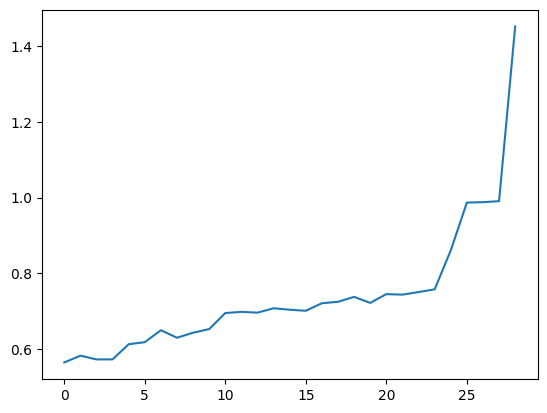

In [13]:
df_tqqq['Volatility'].plot()